# Data Preparation
The variable x_train contains 3 EEG channels, 140 trials with 9 seconds each. Each trial has 1152 units of data. Thus, each second in a trial produces 128 units of signal data. The variable y_train contains the classlabels ‘1’, ‘2’ for left and right, respectively. x_test contains another set of 140 trials. The cue was presented from t = 3s to 9s. At the same time, the feedback was presented to the subject. Within this period, it should be possible to distinguish the two types of trials. 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/ThakdanaiSaelee/CE903_group_project/main/dataset/x_train.csv', header=None)
data.head()

,0,1,2,3,4,5,6,7,8,9,...,410,411,412,413,414,415,416,417,418,419
0,0.010254,0.081055,0.062500,-0.091797,-0.057617,-0.084473,0.056641,0.061523,0.039062,-0.125490,...,0.019531,0.045410,0.035156,0.070312,0.023926,-0.050293,-0.012207,0.041504,0.044434,0.095703
1,-0.023926,0.076172,0.034180,-0.080078,-0.026367,-0.105960,0.009277,0.041992,0.031738,-0.114260,...,0.134770,0.116210,0.073730,0.084473,0.007812,-0.053711,-0.034668,0.063965,0.070801,0.067871
2,-0.009766,0.077637,0.065918,-0.073730,0.004883,-0.086426,-0.078613,0.015625,0.012695,-0.109860,...,0.162110,0.135740,0.081543,0.042480,0.040527,0.019043,-0.011719,0.050781,0.050293,-0.002441
3,0.048828,0.112300,0.123050,-0.067871,-0.020996,-0.076172,-0.157230,-0.002930,-0.024902,-0.101070,...,0.160640,0.101560,0.058594,0.003906,0.104980,0.063477,-0.006348,0.053223,0.066895,-0.007812
4,-0.038086,0.037109,0.066895,-0.092773,-0.029297,-0.067871,-0.153320,-0.011230,-0.027344,-0.097168,...,0.144040,0.063965,0.061035,-0.001465,0.103030,0.086914,0.011719,0.042480,0.098633,0.025391


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1152 entries, 0 to 1151
Columns: 420 entries, 0 to 419
dtypes: float64(420)
memory usage: 3.7 MB


In [4]:
data.describe()

,0,1,2,3,4,5,6,7,8,9,...,410,411,412,413,414,415,416,417,418,419
count,1152.000000,1152.000000,1152.000000,1152.000000,1152.000000,1152.000000,1152.000000,1152.000000,1152.000000,1152.000000,...,1152.000000,1152.000000,1152.000000,1152.000000,1152.000000,1152.000000,1152.000000,1152.000000,1152.000000,1152.000000
mean,-0.001096,-0.000807,-0.001366,-0.003607,-0.004327,-0.003292,0.001268,0.000935,0.000061,0.001479,...,-0.000958,-0.000747,0.002211,0.000488,0.001813,0.002936,0.001481,-0.000760,0.003910,0.000398
std,0.063368,0.069890,0.067713,0.067318,0.066974,0.075070,0.092757,0.073431,0.066523,0.059947,...,0.125157,0.117597,0.150653,0.121240,0.076571,0.081800,0.089683,0.121255,0.104085,0.087604
min,-0.181150,-0.219730,-0.252440,-0.258300,-0.268550,-0.351070,-0.291990,-0.228520,-0.241210,-0.225590,...,-0.497560,-0.540040,-0.437500,-0.452640,-0.271970,-0.210940,-0.329100,-0.393070,-0.354490,-0.299800
25%,-0.041138,-0.047485,-0.047852,-0.046387,-0.049316,-0.047363,-0.056152,-0.046997,-0.041504,-0.038574,...,-0.078735,-0.066895,-0.088989,-0.066040,-0.043945,-0.055664,-0.048340,-0.077759,-0.062500,-0.052856
50%,-0.003418,-0.000732,-0.002441,-0.004150,-0.002197,-0.001953,0.003174,0.003174,0.002197,0.000977,...,0.008789,0.011963,0.000244,0.008545,0.004150,0.001221,0.003662,0.007812,0.003906,0.004639
75%,0.041626,0.042114,0.046020,0.039551,0.039184,0.046020,0.065918,0.050781,0.044434,0.042602,...,0.079102,0.077270,0.091309,0.083008,0.053345,0.061523,0.062012,0.091919,0.070801,0.058594
max,0.225590,0.245610,0.215330,0.279790,0.250490,0.264160,0.234380,0.209960,0.196780,0.205080,...,0.377440,0.378420,0.629390,0.382320,0.267090,0.256840,0.237790,0.285160,0.297850,0.263180


In [5]:
data = data.values
sensor1 = np.zeros((1152,140))
sensor2 = np.zeros((1152,140))
sensor3 = np.zeros((1152,140))
column = 0
column2 = 0
column3 = 0
for i in range(420):
    if i<140:
        sensor1[:,column] = data[:,i]
        column += 1
    elif i>=140 and i<280:
        sensor2[:,column2] = data[:,i]
        column2 += 1
    elif i>=280 and i<420:
        sensor3[:,column3] = data[:,i]
        column3 += 1
sensor1 = sensor1.T
sensor2 = sensor2.T
sensor3 = sensor3.T

In [ ]:
sensor1.shape

(140, 1152)

In [ ]:
sensor2.shape

(140, 1152)

In [ ]:
sensor3.shape

(140, 1152)

In [ ]:
print(sensor1)

[[ 0.010254   -0.023926   -0.0097656  ...  0.1084      0.17334
   0.22559   ]
 [ 0.081055    0.076172    0.077637   ...  0.13135     0.18359
   0.24561   ]
 [ 0.0625      0.03418     0.065918   ...  0.064941    0.10449
   0.12939   ]
 ...
 [-0.097656   -0.1167     -0.14502    ...  0.037109    0.046875
   0.037598  ]
 [ 0.13574     0.104       0.066406   ...  0.076172    0.056152
   0.019531  ]
 [ 0.11816     0.10889     0.083008   ...  0.018066    0.026855
  -0.00048828]]


In [ ]:
print(sensor2)

[[ 0.09375     0.11133     0.10205    ...  0.038086    0.01416
  -0.0097656 ]
 [ 0.0092773  -0.039062   -0.029297   ...  0.079102   -0.0087891
  -0.024414  ]
 [ 0.069336    0.0019531   0.011719   ... -0.00097656 -0.045898
  -0.052246  ]
 ...
 [-0.05127    -0.08252    -0.034668   ...  0.08252     0.060547
  -0.026855  ]
 [-0.025391   -0.012695    0.032715   ...  0.062988    0.10449
   0.086914  ]
 [ 0.14014     0.104       0.018555   ... -0.11865    -0.054199
  -0.0048828 ]]


In [ ]:
print(sensor3)

[[ 0.13428    0.10986    0.021484  ... -0.15283   -0.063477  -0.04834  ]
 [ 0.0625     0.041992  -0.027832  ... -0.057129  -0.043945  -0.085449 ]
 [ 0.22461    0.21924    0.1709    ... -0.067871  -0.13965   -0.19727  ]
 ...
 [ 0.041504   0.063965   0.050781  ...  0.098145   0.18311    0.18652  ]
 [ 0.044434   0.070801   0.050293  ...  0.0048828  0.1582     0.1582   ]
 [ 0.095703   0.067871  -0.0024414 ... -0.016113   0.092285   0.13379  ]]


In [6]:
sensor = np.stack((sensor1, sensor2, sensor3), axis = 1)
sensor = sensor.reshape((3,140,1152))
sensor = sensor.reshape(sensor.shape[0], (sensor.shape[1] * sensor.shape[2]))
sensor.shape

(3, 161280)

In [7]:
ch_names = ['C3', 'Cz', 'C4']

In [8]:
tmin, tmax = 0, 9 #We are only considering the data after 3 seconds as a decision is only made after that.

# Converting data to signals
We are converting the data which is present in the form of a .csv file into a raw signal data for the ease of processing, feature extraction and feature selection.

In [10]:
!pip install mne
!pip install PyQt5

In [11]:
from mne.io import RawArray
import mne
import matplotlib
import PyQt5
info_sensor = mne.create_info(ch_names = ch_names, sfreq = 128, ch_types=['eeg']*3) #The no. of trials are 140 and each trial is sampled at 128 Hz. Hence, sfreq = 128.
raw = RawArray(sensor, info = info_sensor)
#%matplotlib qt
#raw.plot(show_scrollbars=True, show_scalebars=True)

Creating RawArray with float64 data, n_channels=3, n_times=161280
    Range : 0 ... 161279 =      0.000 ...  1259.992 secs
Ready.


In [12]:
'''fig = raw.plot_psd(fmax=64, average=True) # Visualizing Power-Line Noise in channel Cz
fig.subplots_adjust(top=0.85)
fig.suptitle('UnFiltered Cz', size='xx-large', weight='bold')'''

"fig = raw.plot_psd(fmax=64, average=True) # Visualizing Power-Line Noise in channel Cz\nfig.subplots_adjust(top=0.85)\nfig.suptitle('UnFiltered Cz', size='xx-large', weight='bold')"

In [13]:
'''raw = raw.copy().filter(8, 26)
fig = raw.plot_psd(fmin=0, fmax=64, average=True)
fig.suptitle('Filtered Data', size='xx-large', weight='bold')'''

"raw = raw.copy().filter(8, 26)\nfig = raw.plot_psd(fmin=0, fmax=64, average=True)\nfig.suptitle('Filtered Data', size='xx-large', weight='bold')"

In [14]:
raw.set_montage(mne.channels.make_standard_montage('standard_alphabetic', head_size=0.095))

<RawArray | 3 x 161280 (1260.0 s), ~3.7 MB, data loaded>

In [15]:
epochs =  mne.make_fixed_length_epochs(raw, duration = 9) # Dividing raw into epoch components
data = epochs.get_data()
print(data.shape)

Not setting metadata
Not setting metadata
140 matching events found
No baseline correction applied
0 projection items activated
Loading data for 140 events and 1152 original time points ...
0 bad epochs dropped
(140, 3, 1152)


Loading data for 140 events and 1152 original time points ...
    Using multitaper spectrum estimation with 7 DPSS windows


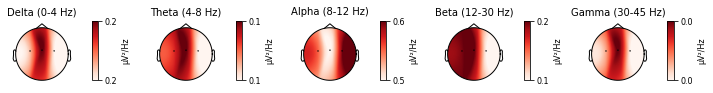

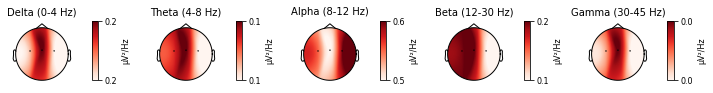

In [16]:
epochs.plot_psd_topomap(ch_type='eeg', normalize=True)

Loading data for 140 events and 1152 original time points ...
    Using multitaper spectrum estimation with 7 DPSS windows


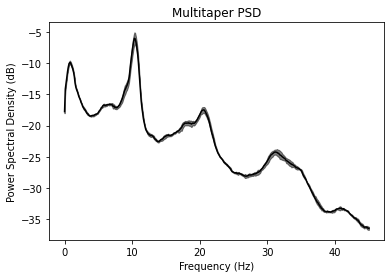

In [17]:
from mne.time_frequency import tfr_morlet, psd_multitaper, psd_welch
f, ax = plt.subplots()
psds, freqs = psd_multitaper(epochs, fmin=0, fmax=45, n_jobs=1)
psds = 10 * np.log10(psds)  # convert to dB
psds_mean = psds.mean(0).mean(0)
psds_std = psds.mean(0).std(0)

ax.plot(freqs, psds_mean, color='k')
ax.fill_between(freqs, psds_mean - psds_std, psds_mean + psds_std,
                color='k', alpha=.5)
ax.set(title='Multitaper PSD', xlabel='Frequency (Hz)',
       ylabel='Power Spectral Density (dB)')
plt.show()

In [18]:
freqs = np.logspace(*np.log10([1, 45]), num=8)
n_cycles = freqs / 2.  # different number of cycle per frequency
power, itc = tfr_morlet(epochs, freqs=freqs, n_cycles=n_cycles, use_fft=True,
                        return_itc=True, decim=3, n_jobs=1)

Loading data for 140 events and 1152 original time points ...


Applying baseline correction (mode: logratio)


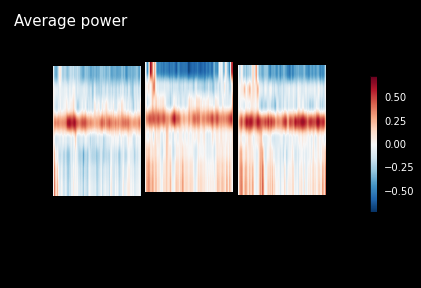

Applying baseline correction (mode: logratio)


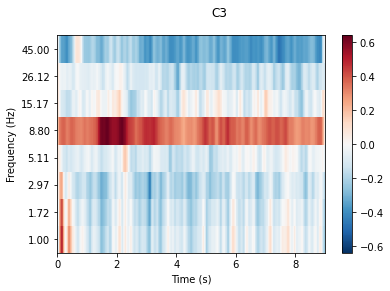

Applying baseline correction (mode: logratio)


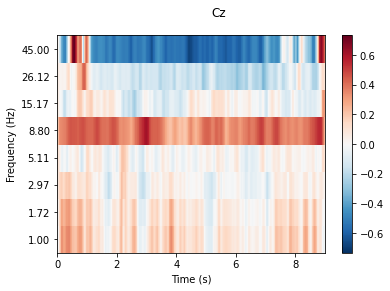

Applying baseline correction (mode: logratio)


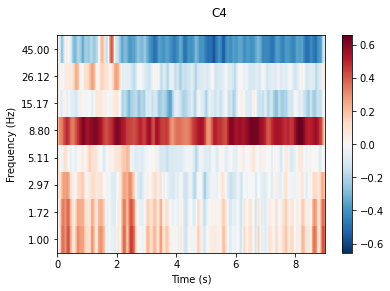

Applying baseline correction (mode: logratio)
Applying baseline correction (mode: logratio)
Applying baseline correction (mode: logratio)


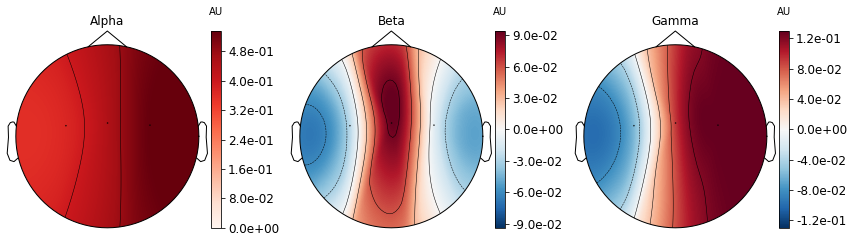

In [19]:
power.plot_topo(baseline=(-0.5, 0), mode='logratio', title='Average power')
power.plot([0], baseline=(-0.5, 0), mode='logratio', title=power.ch_names[0])
power.plot([1], baseline=(-0.5, 0), mode='logratio', title=power.ch_names[1])
power.plot([2], baseline=(-0.5, 0), mode='logratio', title=power.ch_names[2])
fig, axis = plt.subplots(1, 3, figsize=(12, 8))
power.plot_topomap(ch_type='eeg', tmin=0.5, tmax=1.5, fmin=8, fmax=12,
                   baseline=(-0.5, 0), mode='logratio', axes=axis[0],
                   title='Alpha', show=False)
power.plot_topomap(ch_type='eeg', tmin=0.5, tmax=1.5, fmin=13, fmax=25,
                   baseline=(-0.5, 0), mode='logratio', axes=axis[1],
                   title='Beta', show=False)
power.plot_topomap(ch_type='eeg', tmin=0.5, tmax=1.5, fmin=26, fmax=45,
                   baseline=(-0.5, 0), mode='logratio', axes=axis[2],
                   title='Gamma', show=False)
mne.viz.tight_layout()
plt.show()

No baseline correction applied


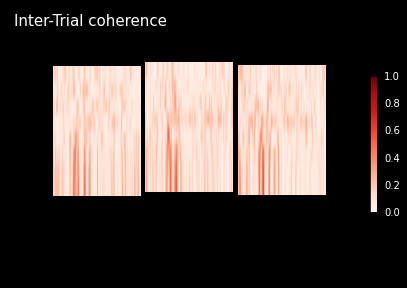

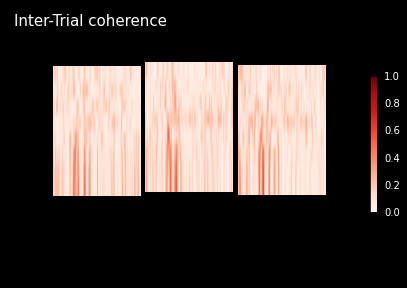

In [20]:
itc.plot_topo(title='Inter-Trial coherence', vmin=0., vmax=1., cmap='Reds')

In [21]:
from mne.time_frequency import tfr_multitaper
tfr = tfr_multitaper(epochs, freqs=freqs, n_cycles=freqs, use_fft=True,
                     return_itc=False, average=False, decim=2)

Loading data for 140 events and 1152 original time points ...
Not setting metadata


In [22]:
pd.set_option('display.max_rows', 40)
df = tfr.to_data_frame(time_format=None)
df.to_csv('Cleaned_data.csv')

# Converting signals in Epochs

In [23]:
from mne import Epochs, pick_types, events_from_annotations

In [24]:
from mne.preprocessing import ICA, create_ecg_epochs
ica = ICA(n_components=3, max_iter='auto', random_state=97)
ica.fit(raw)
ica

Fitting ICA to data using 3 channels (please be patient, this may take a while)
Selecting by number: 3 components


<ipython-input-24-f914bd45229f>:3: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(raw)


Fitting ICA took 0.6s.


Method,fastica
Fit,3 iterations on raw data (161280 samples)
ICA components,3
Explained variance,100.0 %
Available PCA components,3
Channel types,eeg
ICA components marked for exclusion,—


In [25]:
#epochs = mne.make_fixed_length_epochs(final_raw, duration = 0.126) # Dividing raw into epoch components
data = epochs.get_data()
print(data.shape)
print(data)

Loading data for 140 events and 1152 original time points ...
(140, 3, 1152)
[[[ 0.010254   -0.023926   -0.0097656  ...  0.1084      0.17334
    0.22559   ]
  [-0.16406    -0.18799    -0.16602    ...  0.01123    -0.012207
   -0.03418   ]
  [ 0.054199   -0.082031   -0.061523   ... -0.053711   -0.1792
   -0.17871   ]]

 [[ 0.09375     0.11133     0.10205    ...  0.038086    0.01416
   -0.0097656 ]
  [-0.19922    -0.10156     0.023438   ...  0.068359    0.081543
    0.11035   ]
  [-0.019531   -0.084961   -0.056641   ... -0.023438   -0.066895
   -0.044922  ]]

 [[ 0.13428     0.10986     0.021484   ... -0.15283    -0.063477
   -0.04834   ]
  [ 0.027832    0.0048828  -0.0087891  ...  0.045898   -0.0073242
   -0.0039062 ]
  [-0.023926   -0.022949    0.021973   ... -0.023438   -0.077148
   -0.10156   ]]

 ...

 [[-0.2002     -0.21338    -0.2168     ...  0.043457    0.067383
    0.030762  ]
  [-0.00048828 -0.083984   -0.081055   ... -0.058594   -0.19971
   -0.22266   ]
  [ 0.11816     0.10889 

In [27]:
output_data = pd.read_csv('https://raw.githubusercontent.com/ThakdanaiSaelee/CE903_group_project/main/dataset/y_train.csv', header=None)
output_data = np.array(output_data.loc[:,0].tolist())
print(output_data)

[1 2 2 2 2 1 1 2 2 1 1 2 1 2 2 2 2 1 1 1 1 2 1 2 1 2 2 2 2 1 1 2 1 2 1 1 1
 1 1 2 2 2 2 1 1 2 1 2 2 1 2 2 2 1 2 2 1 2 2 1 2 1 2 1 2 2 2 2 2 1 2 1 2 1
 1 1 1 2 1 2 1 2 2 1 1 1 2 1 1 1 1 1 1 2 2 1 2 1 1 1 2 2 2 1 2 2 2 1 1 2 2
 2 1 1 2 1 1 1 2 1 2 1 1 1 2 2 1 2 1 2 1 1 2 1 1 2 1 2 2 1]


# Training epochs into Machine Learning models

In [28]:
!pip install scikit-learn==1.0
!pip install mne_features

     |████████████████████████████████| 23.1 MB 2.5 MB/s 
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.0.2
    Uninstalling scikit-learn-1.0.2:
      Successfully uninstalled scikit-learn-1.0.2


     |████████████████████████████████| 40 kB 2.1 MB/s 
  Created wheel for mne-features: filename=mne_features-0.2-py3-none-any.whl size=26760 sha256=23eea48ca04e8da379b744803215a3f8464325720b21ad312010b00b860cbd9c
  Stored in directory: /root/.cache/pip/wheels/50/7d/94/905a24736d6d8ecd07fb249d02af5391afed5054d26a0b66b8
Successfully built mne-features


In [31]:
from mne_features.feature_extraction import extract_features
from sklearn.model_selection import cross_val_score, KFold
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

In [30]:
selected_funcs = {'ptp_amp'}
X_new = extract_features(data, 128, selected_funcs)

##### 1. Logistic Regression

In [73]:
def best_score(answer):
  best_score = 0
  index = 0
  for position, score in enumerate(answer):
    if score[2] > best_score:
      best_score = score[2]
      index = position

  print('best_feature:', answer[index][0])
  print('best_score:', answer[index][2])

In [65]:
def logistic(X_new):
  pipe = Pipeline([('scaler', StandardScaler()),
                  ('lr', LogisticRegression(random_state=42))]) 
  kf = KFold(n_splits=2, shuffle=True, random_state=4)
  scores = cross_val_score(pipe, X_new, output_data, scoring='accuracy', cv=kf)
  #print('Cross-validation accuracy score = %1.3f (+/- %1.5f)' % (np.mean(scores), np.std(scores)))

  param_grid = {'lr__penalty':['l2'], 'lr__solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}
  lr = GridSearchCV(pipe, param_grid,cv=10,n_jobs=-1)
  lr.fit(X_new,output_data)
  # print("Parameters: "+ str(lr.best_params_))
  # print("Esimaster: "+ str(lr.best_estimator_))
  # print("Score: " + str(lr.best_score_))
  return lr.best_estimator_, lr.best_score_

In [68]:
feature = ['mean','std','ptp_amp','rms','quantile','time_corr','max_cross_corr','app_entropy']
answer = []
for i in range(len(feature)-1):
  for j in range(i+1, len(feature)):
    selected_funcs = {feature[i],feature[j]}
    X_new = extract_features(data, 128, selected_funcs)
    estimator, score = logistic(X_new)
    features = [feature[i],feature[j]]
    answer.append([features,estimator,score])


In [74]:
best_score(answer)

best_feature: ['ptp_amp', 'time_corr']
best_score: 0.5357142857142858


In [71]:
from sklearn.ensemble import GradientBoostingRegressor, RandomForestClassifier
from sklearn.model_selection import GridSearchCV

def randomforrest(X_new):
  rf = RandomForestClassifier(criterion='entropy',random_state=0)
  param_grid = {'n_estimators':[400,450,500,550,600],'max_depth': np.arange(4,20)}
  #'max_depth': np.arange(4,19),'min_samples_split': np.arange(4,19),'min_samples_leaf': np.arange(4,25)}

  rf = GridSearchCV(rf, param_grid,cv=10,n_jobs=-1)
  rf.fit(X_new,output_data)
  return rf.best_estimator_, rf.best_score_

# print("Parameters: "+ str(rf.best_params_))
# print("Parameters: "+ str(rf.best_estimator_))
# print("Score: " + str(rf.best_score_))

In [75]:
answer_random = []
for i in range(len(feature)-1):
  for j in range(i+1, len(feature)):
    selected_funcs = {feature[i],feature[j]}
    X_new = extract_features(data, 128, selected_funcs)
    estimator, score = randomforrest(X_new)
    features = [feature[i],feature[j]]
    answer_random.append([features,estimator,score])

KeyboardInterrupt: ignored

In [ ]:
best_score(answer_random)

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_validate
xgb = GradientBoostingClassifier(random_state=1)
cv = KFold(n_splits=2,shuffle=True)
#performing grid-search to tune-hyper-parameters
parameter_grid = {'n_estimators':[10,20,30,50,100], 'learning_rate':[0.1,0.7,1.0], 'max_depth':[3,7,15,30]}
search = GridSearchCV(xgb, parameter_grid, n_jobs=-1,cv=cv)
#fitting the model
search.fit(X_new,output_data)

#scores = cross_validate(search, X_new, output_data, scoring=['accuracy'], cv=cv, return_estimator=True)
#print('Average accuracy', np.mean(scores['test_accuracy']))

print("Parameters: "+ str(search.best_params_))
print("Parameters: "+ str(search.best_estimator_))
print("Score: " + str(search.best_score_))

{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 20}
Average accuracy 0.5642857142857143
